# Graphical Data Analysis

When you get a set of measurements, ask yourself:
- What do you want to learn from this data?
- What is your hypothesis, and what would it look like if the data supports or does not support your hypothesis?
- **Plot your data!** (and always label your plots clearly) (Helsel, 2020 (Ch 2))

## Reporting of Numbers

- Keep track of **units**, and always report units with your numbers!
  - Make sure to check metadata about how the measurements were made
- Significant figures
  - From our snow depth example last week:
    - Should I report a snow depth value of 20.3521 cm?
    - Should I report a snow depth value of 2035 mm?
    - Should I report a snow depth value of 20.0000 cm?
  - Consider the certainty with which you know a value. Don't include any more precision beyond that
  - Note: Rounding errors - Allow the computer to include full precision for intermediate calculations, round to significant figures for the final result of the computation that you report in the answer
  
---

To start, we will import some python packages:

In [19]:
# numpy has a lot of math and statistics functions we'll need to use
import numpy as np

 # pandas gives us a way to work with and plot tabular datasets easily (called "dataframes")
import pandas as pd

# we'll use matplotlib for plotting here (it works behind the scenes in pandas)
import matplotlib.pyplot as plt 
from matplotlib import dates # import the dates module to help with formatting date/time labels on plots

# tell jupyter how to make our plots, "widget" for interactive plots, or "inline" for static plots
%matplotlib inline

### Why are you plotting?

**You have an application in mind with your data.** This application should inform your choice of analysis technique, what you want to plot and visualize.

Open our file using the pandas [read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [53]:
# Use pandas.read_csv() function to open this file.
# This stores the data in a "Data Frame"
my_data = pd.read_csv('data/frog1_30d1m.csv')

In [54]:
# look at the first few rows of data with the .head() method
my_data.head()

,Time,CO2 (PPM),Humidity (%),Temperature (degC),Barometric Pressure (mBar),Latitude,Longitude
0,2023-06-20T21:30:00-07:00,416.450200,82.972410,14.080494,1018.054000,47.71,-122.18
1,2023-06-20T21:31:00-07:00,423.509927,82.467095,14.510223,1018.062000,47.71,-122.18
2,2023-06-20T21:32:00-07:00,455.278700,81.132510,14.879460,1018.071000,47.71,-122.18
3,2023-06-20T21:33:00-07:00,439.838186,79.478017,15.225836,1018.085000,47.71,-122.18
4,2023-06-20T21:34:00-07:00,432.147009,77.503135,15.615975,1018.119818,47.71,-122.18


In [62]:
# set our Time column to a pandas datetime format
my_data['Time'] = pd.to_datetime(my_data['Time'], format='mixed')

# We want to use our "Time" column as the index of the dataframe
my_data.set_index('Time', inplace=True)

### Timeseries plots

- If we are interested in how some random variable changes over time.
- Similarly, if we have a spatial dimension and are interested in how a variable change along some length we could make a spatial plot.

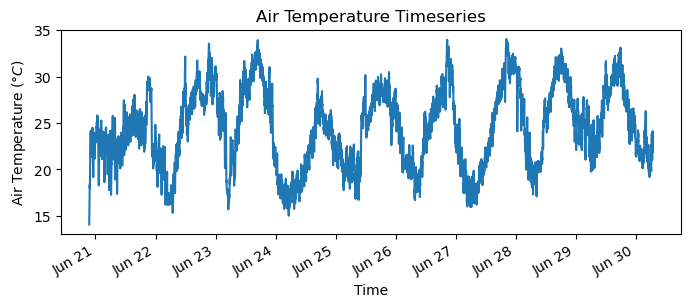

In [70]:
# create a figure, and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))

# plot the temperature observations
ax = my_data['Temperature (degC)'].plot()

# custom date format for x-axis labels (see https://strftime.org/ for how to format dates)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d')) 

# label the y-axis (we can use LaTeX syntax to render special characters)
ax.set_ylabel('Air Temperature ($\degree C$)') 

# give the figure a title
ax.set_title('Air Temperature Timeseries', fontweight='bold')

# save a copy of the figure as an image
plt.savefig('ribbit_air_temp.jpg')

This data looks noisy, we can compute hourly averages with pandas

In [65]:
my_data_hourly = my_data.resample('1H').mean()

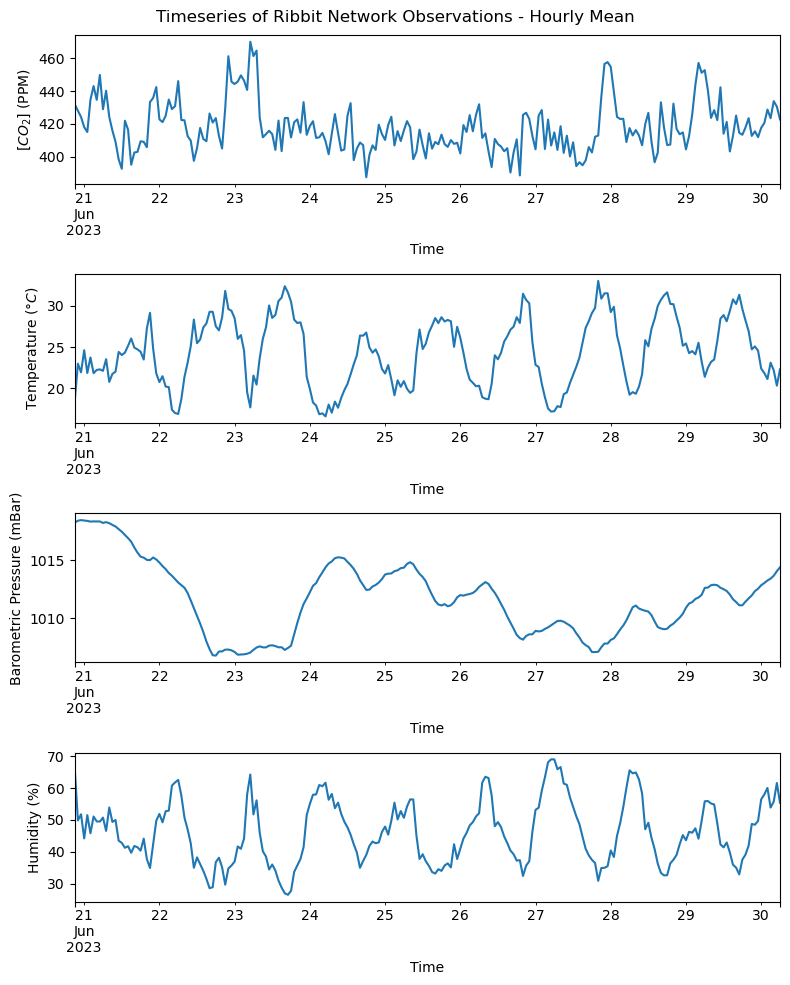

In [87]:
# create a figure, with 4 rows of subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8,10), tight_layout=True)

# get an individual axis from the list of all axes (our 4 subplots)
[ax_co2, ax_temp, ax_pres, ax_rh] = axes.ravel()

# plot carbon dioxide concentration
my_data_hourly['CO2 (PPM)'].plot(ax=ax_co2)
# label the y-axis
ax_co2.set_ylabel('[$CO_2$] (PPM)') 

# plot temperature
my_data_hourly['Temperature (degC)'].plot(ax=ax_temp)
# label the y-axis
ax_temp.set_ylabel('Temperature ($\degree C$)') 

# plot barometric pressure
my_data_hourly['Barometric Pressure (mBar)'].plot(ax=ax_pres)
# label the y-axis
ax_pres.set_ylabel('Barometric Pressure (mBar)') 

# plot relative humidity
my_data_hourly['Humidity (%)'].plot(ax=ax_rh)
# label the y-axis
ax_rh.set_ylabel('Humidity (%)') 

# give the figure a title
plt.suptitle('Timeseries of Ribbit Network Observations - Hourly Means', fontweight='bold')

# save a copy of the figure as an image
plt.savefig('ribbit_timeseries.jpg')

### Scatterplots

- If we're looking for relationships btween variables within our data, try making [scatterplots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html). 
- Later this quarter we'll get into statistical tests for correllation where we'll use scatterplots to visualize our data. 
- **Remember that correlation =/= causation!**

Text(0.5, 1.0, 'Temperature vs Humidity')

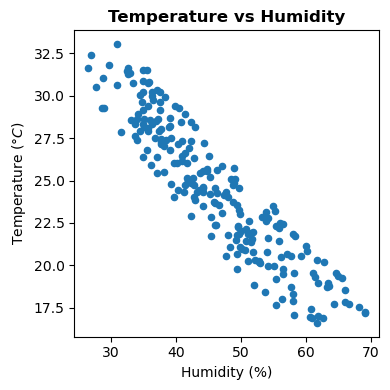

In [129]:
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
my_data_hourly.plot.scatter(x='Humidity (%)', y='Temperature (degC)', ax=ax)
ax.set_xlabel('Humidity (%)')
ax.set_ylabel('Temperature ($\degree C$)') 
ax.set_title('Temperature vs Humidity', fontweight='bold')

In [132]:
x = my_data_hourly['Humidity (%)']
y = my_data_hourly['Temperature (degC)']

m, b, _, _, _ = linregress(x, y)

y_linear_model = m*x + b

Text(0.5, 1.0, 'Temperature vs Humidity')

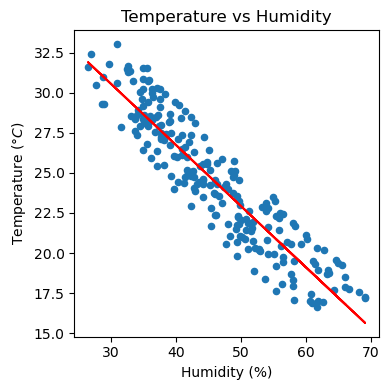

In [133]:
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
my_data_hourly.plot.scatter(x='Humidity (%)', y='Temperature (degC)', ax=ax)

ax.plot(x, y_linear_model, color='red')


ax.set_xlabel('Humidity (%)')
ax.set_ylabel('Temperature ($\degree C$)') 
ax.set_title('Temperature vs Humidity')



## Be careful! Depending only on the axes limits we choose, we can make the data look very different


## Adding a regression line can sometimes be misleading (suggesting there's a trend even if there isn't)


## Just because I've plotted a linear regression here, doesn't mean that it's statistically significant!




# We can make the data look a lot different by just changing the axes limites
# This can be misleading, be careful!

### Histogram plots

- We are probably interested in what kind of distribution our data has.
- Make a histogram plot to quickly inspect (Note: Careful with the choice of [number or width of bins](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width))
- See documentation for making [histograms with pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist), and [histograms with matplotlib](https://matplotlib.org/3.1.3/gallery/statistics/hist.html)

Text(0.5, 1.0, 'Carbon Dioxide Concentration (PPM) Histogram')

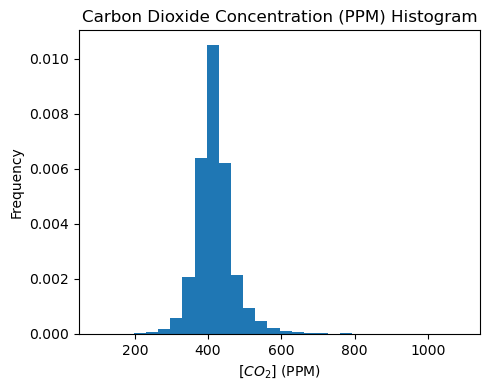

In [101]:
fig, ax = plt.subplots(figsize=(5,4), tight_layout=True)
my_data['CO2 (PPM)'].plot.hist(bins=30, density=True, ax=ax)
ax.set_xlabel('[$CO_2$] (PPM)')
plt.title('Carbon Dioxide Concentration (PPM) Histogram', fontweight='bold')

### Boxplots

- A [boxplot](https://en.wikipedia.org/wiki/Box_plot) (sometimes called "box-and-whisker" plots) can also help visualize a distribution, especially when we want to compare multiple data sets side by side.
- The box usually represents the interquartile range (IQR) (between the 25th and 75th percentiles)
- Symbols (lines, circles, etc) within the box can represent the sample mean and/or median
- Vertical line "whiskers" can represent the full range (minimum to maximum) or another percentile range (such as 2nd and 98th percentiles)
- Data points beyond the "whiskers" are "outliers"
- What each symbol represents can vary, so be sure to check documentation to be sure! See documentation for making [boxplots with pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), and [boxplots with matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.boxplot.html).

In [112]:
# find our average temperature
average_temp = my_data['Temperature (degC)'].mean()

my_data_colder = my_data[my_data['Temperature (degC)'] < average_temp]

my_data_warmer = my_data[my_data['Temperature (degC)'] >= average_temp]

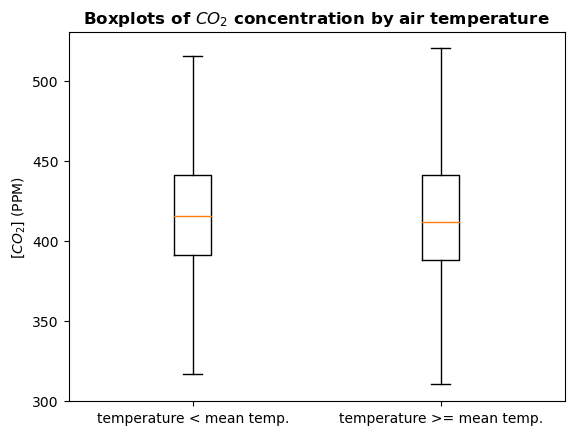

In [130]:
plt.boxplot([my_data_colder['CO2 (PPM)'], my_data_warmer['CO2 (PPM)']], 
            labels=('temperature < mean temp.','temperature >= mean temp.'), showfliers=False)

plt.ylabel('[$CO_2$] (PPM)')
plt.title('Boxplots of $CO_2$ concentration by air temperature', fontweight='bold');

---

## Ethics in graphical analysis

**Be careful!**
- Others could try and manipulate plots and statistics to convince us of something
- We can end up tricking outselves with "wishful thinking" and "confirmation bias" if we are not careful
- This is why we have statistical tests, they're our attempt to find objective measures of "is this a true trend"
- **Don't draw a trendline through data when there isn't a statisticaly significant trend!**